<a href="https://colab.research.google.com/github/zrbeaty/zorabio108tutorial/blob/main/Week_11_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Harbour Porpoise Distribution and Foraging Activity

Stedt, Johanna; Wahlberg, Magnus; Carlström, Julia et al. (2023). Micro-scale spatial preference and temporal cyclicity linked to foraging in harbour porpoises [Dataset]. Dryad. https://doi.org/10.5061/dryad.c59zw3rc0

The **major questions** of this paper are what is the connection between harbour porpoises and foraging, and what are the patterns of harbour porpoise presence and foraging?

The **hypothesis** of this study is prey availability drives porpoise presence within the Kullen peninsula.

The **findings** of this paper are large acoustic activity differences between sites were found indicating spatial preference. Higher presence (acoustic) and foraging activity was found at night for a 24h cycle for all sites. All sites also had a second peak at 29.5 d, linked to the lunar cycle with higher presence and foraging activity during the full moon. Presence and foraging activity was highest during autumn and winter, between the months of September and December. There is a linkage between spatial and temporal patterns and foraging supported by a positive correlation between porpoise presence and percent of time present.

# Objective

I aim to determine the **relationship between lunar illumination and activity** (foraging and presence) for Site 1 since Site 1 had the highest activity, and it would be easier to simplify my analysis to one site.

**Lunar illumination** variations are associated with lunar phase, which is a type of temporal classification based on lunar illumination and illumination progress (increasing, decreasing).

Prior to reading this study, I was not aware of lunar phase effects on marine species. I am currently studying climate change and human impacts on bottlenose dolphins, a type of cetacean, and therefore, I would love to learn more about impacts on abundance and foraging activity for harbour porpoises, another type of cetacean.



#Data Pre-processing

Since this study was based in Sweden, the data uses  different metrics compared to the United States. I will clean the data (convert to U.S. metrics) so I am able to perform the analysis needed to meet my objective.

In [1]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
### Import the dataset of interest
file_url_hb= "https://docs.google.com/spreadsheets/d/1eC9OhgvPX1jngZnWvWmuf2oYV-YlT2xCDMj1JqH-B8I/" + "export?gid=0&format=csv"
harbour_porpoises_activity=pd.read_csv(file_url_hb,
                                       parse_dates=['DateTime'],
                                       dayfirst=True)
harbour_porpoises_activity

,DateTime,Month,Hour,LunarIll,LunarPhase,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
0,2014-04-10 19:59:00,4,20,80.18,Waxing gibbous,54.0,0.0,0.0,2,4.0,1.0,"75,9",0,0,50,0,100
1,2014-04-10 20:59:00,4,21,80.50,Waxing gibbous,4.0,0.0,0.0,16,0.0,0.0,0,0,0,"56,3",0,0
2,2014-04-10 21:59:00,4,22,80.81,Waxing gibbous,14.0,12.0,14.0,19,0.0,0.0,"28,6","16,7","7,1","42,1",0,0
3,2014-04-10 22:59:00,4,23,81.13,Waxing gibbous,26.0,48.0,45.0,47,0.0,0.0,"65,4","54,2","51,1","46,8",0,0
4,2014-04-10 23:59:00,4,24,81.44,Waxing gibbous,49.0,58.0,46.0,39,0.0,0.0,"63,3","82,8","47,8","56,4",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8192,2015-03-18 03:59:00,3,4,8.08,New,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8193,2015-03-18 04:59:00,3,5,7.80,New,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,"45,5",NaN,NaN
8194,2015-03-18 05:59:00,3,6,7.53,New,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8195,2015-03-18 06:59:00,3,7,7.27,New,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [3]:
#View the aspects of the data for each column
harbour_porpoises_activity.dtypes

,0
DateTime,datetime64[ns]
Month,int64
Hour,int64
LunarIll,float64
LunarPhase,object
DPM1,float64
DPM2,float64
DPM3,float64
DPM4,int64
DPM5,float64


In [4]:
#Import data using datetime and no data value. Assign index column as DateTime.
harbour_porpoises_activity = pd.read_csv(file_url_hb,
                                         parse_dates=['DateTime'],
                                         dayfirst=True,
                                         index_col=['DateTime'])

# View the data
harbour_porpoises_activity.head()

,Month,Hour,LunarIll,LunarPhase,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
DateTime,,,,,,,,,,,,,,,,
2014-04-10 19:59:00,4,20,80.18,Waxing gibbous,54.0,0.0,0.0,2,4.0,1.0,"75,9",0,0,50,0,100
2014-04-10 20:59:00,4,21,80.50,Waxing gibbous,4.0,0.0,0.0,16,0.0,0.0,0,0,0,"56,3",0,0
2014-04-10 21:59:00,4,22,80.81,Waxing gibbous,14.0,12.0,14.0,19,0.0,0.0,"28,6","16,7","7,1","42,1",0,0
2014-04-10 22:59:00,4,23,81.13,Waxing gibbous,26.0,48.0,45.0,47,0.0,0.0,"65,4","54,2","51,1","46,8",0,0
2014-04-10 23:59:00,4,24,81.44,Waxing gibbous,49.0,58.0,46.0,39,0.0,0.0,"63,3","82,8","47,8","56,4",0,0


In [5]:
#View summary statistics
harbour_porpoises_activity.describe()

,Month,Hour,LunarIll,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6
count,8197.000000,8197.000000,8197.000000,7215.000000,5748.000000,7707.000000,8197.000000,7364.000000,7363.000000
mean,6.739539,12.497987,50.422372,27.637699,16.231733,15.800052,17.122850,8.763308,7.419802
std,3.461158,6.926065,35.168639,18.670939,15.740817,16.171306,16.071678,12.199363,13.456539
min,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,6.000000,15.460000,11.000000,4.000000,3.000000,4.000000,0.000000,0.000000
50%,7.000000,12.000000,50.620000,26.000000,11.000000,10.000000,13.000000,4.000000,1.000000
75%,10.000000,19.000000,85.590000,44.000000,24.000000,24.000000,26.000000,12.000000,8.000000
max,12.000000,24.000000,100.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000


In [6]:
#For each FPP column, replace , with a .

harbour_porpoises_activity['FPP1'] = harbour_porpoises_activity['FPP1'].str.replace(',', '.')
harbour_porpoises_activity.FPP1

harbour_porpoises_activity['FPP2'] = harbour_porpoises_activity['FPP2'].str.replace(',', '.')
harbour_porpoises_activity.FPP2

harbour_porpoises_activity['FPP3'] = harbour_porpoises_activity['FPP3'].str.replace(',', '.')
harbour_porpoises_activity.FPP3

harbour_porpoises_activity['FPP4'] = harbour_porpoises_activity['FPP4'].str.replace(',', '.')
harbour_porpoises_activity.FPP4

harbour_porpoises_activity['FPP5'] = harbour_porpoises_activity['FPP5'].str.replace(',', '.')
harbour_porpoises_activity.FPP5

harbour_porpoises_activity['FPP6'] = harbour_porpoises_activity['FPP6'].str.replace(',', '.')
harbour_porpoises_activity.FPP6

,FPP6
DateTime,
2014-04-10 19:59:00,100
2014-04-10 20:59:00,0
2014-04-10 21:59:00,0
2014-04-10 22:59:00,0
2014-04-10 23:59:00,0
...,...
2015-03-18 03:59:00,NaN
2015-03-18 04:59:00,NaN
2015-03-18 05:59:00,NaN


In [7]:
#Assign each FPP column as a float data type
harbour_porpoises_activity.FPP1 = harbour_porpoises_activity.FPP1.astype(float)
harbour_porpoises_activity.FPP2 = harbour_porpoises_activity.FPP2.astype(float)
harbour_porpoises_activity.FPP3 = harbour_porpoises_activity.FPP3.astype(float)
harbour_porpoises_activity.FPP4 = harbour_porpoises_activity.FPP4.astype(float)
harbour_porpoises_activity.FPP5 = harbour_porpoises_activity.FPP5.astype(float)
harbour_porpoises_activity.FPP6 = harbour_porpoises_activity.FPP6.astype(float)

In [8]:
#View the aspects of the data for each column to confirm data type changes
harbour_porpoises_activity.dtypes

,0
Month,int64
Hour,int64
LunarIll,float64
LunarPhase,object
DPM1,float64
DPM2,float64
DPM3,float64
DPM4,int64
DPM5,float64
DPM6,float64


In [9]:
#Change DPM4 column to be a float value
harbour_porpoises_activity.DPM4 = harbour_porpoises_activity.DPM4.astype(float)
harbour_porpoises_activity.dtypes

,0
Month,int64
Hour,int64
LunarIll,float64
LunarPhase,object
DPM1,float64
DPM2,float64
DPM3,float64
DPM4,float64
DPM5,float64
DPM6,float64


In [10]:
#According to the variable list, the range for LunarIll should be 0 - 1, but the data ranges from 0 - 100.

#Let's divide each value in the LunarIll by 100 to reflect the proper range.

harbour_porpoises_activity['LunarIll'] = harbour_porpoises_activity['LunarIll'].div(100)
harbour_porpoises_activity['LunarIll']

,LunarIll
DateTime,
2014-04-10 19:59:00,0.8018
2014-04-10 20:59:00,0.8050
2014-04-10 21:59:00,0.8081
2014-04-10 22:59:00,0.8113
2014-04-10 23:59:00,0.8144
...,...
2015-03-18 03:59:00,0.0808
2015-03-18 04:59:00,0.0780
2015-03-18 05:59:00,0.0753


In [11]:
#Confirm all the columns reflect the range of values described in the variable list of the study.
harbour_porpoises_activity.describe()

,Month,Hour,LunarIll,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
count,8197.000000,8197.000000,8197.000000,7215.000000,5748.000000,7707.000000,8197.000000,7364.000000,7363.000000,7215.000000,5748.000000,7707.000000,8197.000000,7364.000000,7363.000000
mean,6.739539,12.497987,0.504224,27.637699,16.231733,15.800052,17.122850,8.763308,7.419802,34.514997,22.428706,22.647541,24.222764,12.106124,8.649627
std,3.461158,6.926065,0.351686,18.670939,15.740817,16.171306,16.071678,12.199363,13.456539,25.114103,22.816087,23.057523,22.813612,19.090552,17.603286
min,1.000000,1.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,6.000000,0.154600,11.000000,4.000000,3.000000,4.000000,0.000000,0.000000,15.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,12.000000,0.506200,26.000000,11.000000,10.000000,13.000000,4.000000,1.000000,31.900000,17.900000,18.800000,21.400000,0.000000,0.000000
75%,10.000000,19.000000,0.855900,44.000000,24.000000,24.000000,26.000000,12.000000,8.000000,50.000000,35.700000,37.500000,40.000000,20.700000,9.100000
max,12.000000,24.000000,1.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [12]:
#Confirm all the columns are the proper data types
harbour_porpoises_activity.dtypes

,0
Month,int64
Hour,int64
LunarIll,float64
LunarPhase,object
DPM1,float64
DPM2,float64
DPM3,float64
DPM4,float64
DPM5,float64
DPM6,float64


In [13]:
#View information for the index.
harbour_porpoises_activity.index

DatetimeIndex(['2014-04-10 19:59:00', '2014-04-10 20:59:00',
               '2014-04-10 21:59:00', '2014-04-10 22:59:00',
               '2014-04-10 23:59:00', '2014-04-11 00:59:00',
               '2014-04-11 01:59:00', '2014-04-11 02:59:00',
               '2014-04-11 03:59:00', '2014-04-11 04:59:00',
               ...
               '2015-03-17 22:59:00', '2015-03-17 23:59:00',
               '2015-03-18 00:59:00', '2015-03-18 01:59:00',
               '2015-03-18 02:59:00', '2015-03-18 03:59:00',
               '2015-03-18 04:59:00', '2015-03-18 05:59:00',
               '2015-03-18 06:59:00', '2015-03-18 07:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=8197, freq=None)

In [14]:
#View the dataset
harbour_porpoises_activity

,Month,Hour,LunarIll,LunarPhase,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
DateTime,,,,,,,,,,,,,,,,
2014-04-10 19:59:00,4,20,0.8018,Waxing gibbous,54.0,0.0,0.0,2.0,4.0,1.0,75.9,0.0,0.0,50.0,0.0,100.0
2014-04-10 20:59:00,4,21,0.8050,Waxing gibbous,4.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,56.3,0.0,0.0
2014-04-10 21:59:00,4,22,0.8081,Waxing gibbous,14.0,12.0,14.0,19.0,0.0,0.0,28.6,16.7,7.1,42.1,0.0,0.0
2014-04-10 22:59:00,4,23,0.8113,Waxing gibbous,26.0,48.0,45.0,47.0,0.0,0.0,65.4,54.2,51.1,46.8,0.0,0.0
2014-04-10 23:59:00,4,24,0.8144,Waxing gibbous,49.0,58.0,46.0,39.0,0.0,0.0,63.3,82.8,47.8,56.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-18 03:59:00,3,4,0.0808,New,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2015-03-18 04:59:00,3,5,0.0780,New,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,45.5,NaN,NaN
2015-03-18 05:59:00,3,6,0.0753,New,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [15]:
#Remove missing data values
hpa_clean = harbour_porpoises_activity.dropna()

In [16]:
#View the clean dataset
hpa_clean

,Month,Hour,LunarIll,LunarPhase,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
DateTime,,,,,,,,,,,,,,,,
2014-04-10 19:59:00,4,20,0.8018,Waxing gibbous,54.0,0.0,0.0,2.0,4.0,1.0,75.9,0.0,0.0,50.0,0.0,100.0
2014-04-10 20:59:00,4,21,0.8050,Waxing gibbous,4.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,56.3,0.0,0.0
2014-04-10 21:59:00,4,22,0.8081,Waxing gibbous,14.0,12.0,14.0,19.0,0.0,0.0,28.6,16.7,7.1,42.1,0.0,0.0
2014-04-10 22:59:00,4,23,0.8113,Waxing gibbous,26.0,48.0,45.0,47.0,0.0,0.0,65.4,54.2,51.1,46.8,0.0,0.0
2014-04-10 23:59:00,4,24,0.8144,Waxing gibbous,49.0,58.0,46.0,39.0,0.0,0.0,63.3,82.8,47.8,56.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-06 02:59:00,12,3,0.9963,Full,7.0,36.0,60.0,60.0,25.0,9.0,14.3,30.6,78.3,91.7,36.0,44.4
2014-12-06 03:59:00,12,4,0.9967,Full,11.0,14.0,54.0,56.0,25.0,15.0,27.3,35.7,53.7,71.4,48.0,20.0
2014-12-06 04:59:00,12,5,0.9971,Full,14.0,41.0,57.0,59.0,15.0,16.0,35.7,41.5,47.4,84.7,26.7,18.8


# Analytical Approaches

I would like to implement **linear regression models** to relate lunar illumination to foraging activity and lunar phase to presence activity, to estimate how a change in lunar illumination affects the average foraging activity and average presence activity for Site 1 on a given day.


#Analysis

Let's create linear regression models to analyze the relationship of interest.

In [17]:
#Import the following packages
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [49]:
#Import the following to perform linear regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

For simplicity, let's filter the data to include values between Novemeber and December since winter is one of the seasons when activity was overall highest.

In [161]:
dpm1 = hpa_clean[(hpa_clean.index >= "2014-11-01") & (hpa_clean.index <= "2024-12-31")]
fpp1 = hpa_clean[(hpa_clean.index >= "2014-11-01") & (hpa_clean.index <= "2024-12-31")]

Create new dataframes with a few selected columns from the cleaned dataset.


In [162]:
#View the new dataset.
dpm1

,Month,Hour,LunarIll,LunarPhase,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
DateTime,,,,,,,,,,,,,,,,
2014-11-01 00:59:00,11,1,0.5971,First quarter,28.0,21.0,13.0,22.0,7.0,19.0,42.9,61.9,0.0,13.6,0.0,21.1
2014-11-01 01:59:00,11,2,0.6018,First quarter,30.0,22.0,19.0,16.0,17.0,1.0,40.0,36.4,21.1,0.0,23.5,0.0
2014-11-01 02:59:00,11,3,0.6065,First quarter,23.0,32.0,15.0,20.0,17.0,11.0,39.1,43.8,13.3,40.0,5.9,18.2
2014-11-01 03:59:00,11,4,0.6112,Waxing gibbous,24.0,41.0,8.0,9.0,10.0,11.0,33.3,39.0,62.5,55.6,30.0,27.3
2014-11-01 04:59:00,11,5,0.6159,Waxing gibbous,10.0,21.0,33.0,28.0,14.0,20.0,40.0,14.3,39.4,14.3,42.9,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-06 02:59:00,12,3,0.9963,Full,7.0,36.0,60.0,60.0,25.0,9.0,14.3,30.6,78.3,91.7,36.0,44.4
2014-12-06 03:59:00,12,4,0.9967,Full,11.0,14.0,54.0,56.0,25.0,15.0,27.3,35.7,53.7,71.4,48.0,20.0
2014-12-06 04:59:00,12,5,0.9971,Full,14.0,41.0,57.0,59.0,15.0,16.0,35.7,41.5,47.4,84.7,26.7,18.8


In [163]:
#View the second new dataset.
fpp1

,Month,Hour,LunarIll,LunarPhase,DPM1,DPM2,DPM3,DPM4,DPM5,DPM6,FPP1,FPP2,FPP3,FPP4,FPP5,FPP6
DateTime,,,,,,,,,,,,,,,,
2014-11-01 00:59:00,11,1,0.5971,First quarter,28.0,21.0,13.0,22.0,7.0,19.0,42.9,61.9,0.0,13.6,0.0,21.1
2014-11-01 01:59:00,11,2,0.6018,First quarter,30.0,22.0,19.0,16.0,17.0,1.0,40.0,36.4,21.1,0.0,23.5,0.0
2014-11-01 02:59:00,11,3,0.6065,First quarter,23.0,32.0,15.0,20.0,17.0,11.0,39.1,43.8,13.3,40.0,5.9,18.2
2014-11-01 03:59:00,11,4,0.6112,Waxing gibbous,24.0,41.0,8.0,9.0,10.0,11.0,33.3,39.0,62.5,55.6,30.0,27.3
2014-11-01 04:59:00,11,5,0.6159,Waxing gibbous,10.0,21.0,33.0,28.0,14.0,20.0,40.0,14.3,39.4,14.3,42.9,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-06 02:59:00,12,3,0.9963,Full,7.0,36.0,60.0,60.0,25.0,9.0,14.3,30.6,78.3,91.7,36.0,44.4
2014-12-06 03:59:00,12,4,0.9967,Full,11.0,14.0,54.0,56.0,25.0,15.0,27.3,35.7,53.7,71.4,48.0,20.0
2014-12-06 04:59:00,12,5,0.9971,Full,14.0,41.0,57.0,59.0,15.0,16.0,35.7,41.5,47.4,84.7,26.7,18.8


Calculate the mean for each lunar phase to see how dpm (detection positive minutes), which is the metric for porpoise presence, changes based on the lunar phase for Site 1.

**Note to Professor Chang:** I did not want to delete this analysis as I created this plot prior to realizing that lunar phase is a categorical variable, and therefore, I could not perform a linear regression model which looks at the relationship between lunar phase and activity (presence or foraging).

In [82]:
#Use the group.by function to calculate the mean for each lunar phase

#Set as_index = False to avoid fixing group columns with index
dpm1_avg = dpm1_lunar.groupby(['LunarPhase'], as_index = False).mean()

In [165]:
#View the mean (average) values for each lunar phase.
dpm1_avg

,LunarPhase,DPM1
0,First quarter,28.890909
1,Full,31.787933
2,New,26.985948
3,Third quarter,31.810881
4,Waning crescent,27.902290
5,Waning gibbous,22.985318
6,Waxing crescent,26.012232
7,Waxing gibbous,26.080371


Text(0.5, 1.0, 'Changes in Average DPM based on Lunar Phase for Site 1')

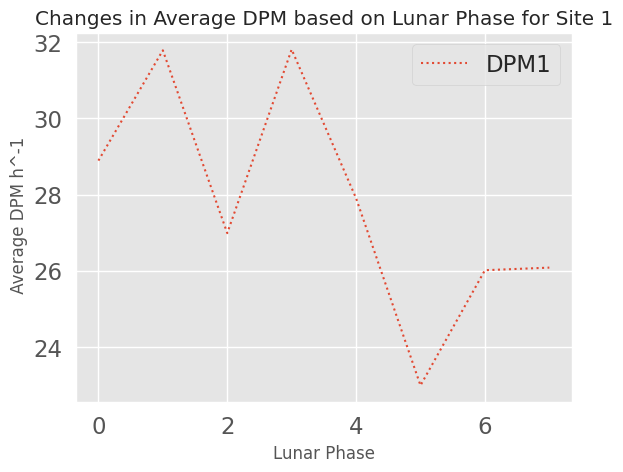

In [166]:
#Create a plot showing how DPM1 changes based on the lunar phase
dpm1_avg.plot(style=[':', '--', '-']);
plt.xlabel("Lunar Phase")
plt.ylabel(" Average DPM h^-1")
plt.title("Changes in Average DPM based on Lunar Phase for Site 1")

Create a scatterplot using dpm1 (filtered dataset) to examine relationship between lunar illumination and porpoise presence for Site 1.




Text(0.5, 1.0, 'Lunar Illumination Effect on DPM for Site 1')

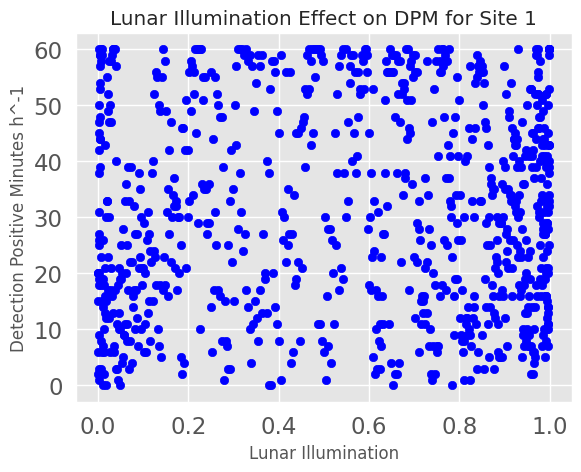

In [168]:
plt.scatter(dpm1['LunarIll'], dpm1['DPM1'], color = "blue")
plt.xlabel("Lunar Illumination")
plt.ylabel("Detection Positive Minutes h^-1")
plt.title("Lunar Illumination Effect on DPM for Site 1")

Create a scatterplot using fpp1 (filtered dataset) to examine relationship between lunar illumination and porpoise foraging activity for Site 1.




Text(0.5, 1.0, 'Lunar Illumination Effect on FPP for Site 1')

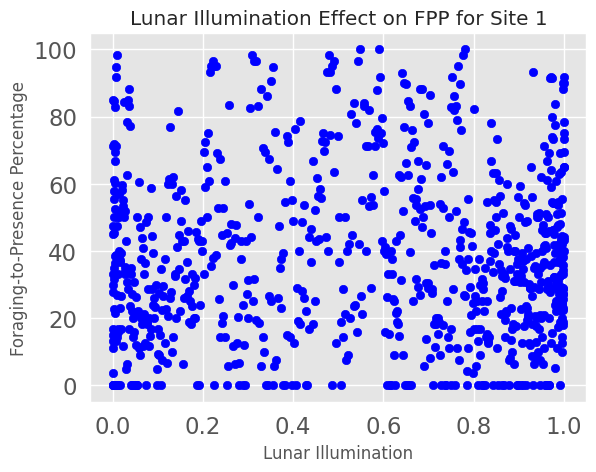

In [169]:
plt.scatter(fpp1['LunarIll'], fpp1['FPP1'], color = "blue")
plt.xlabel("Lunar Illumination")
plt.ylabel("Foraging-to-Presence Percentage")
plt.title("Lunar Illumination Effect on FPP for Site 1")

Define the independent and dependent variables for the linear regression analysis.


In [174]:
x_dpm = dpm1[["LunarIll"]] #independent variable
y_dpm = dpm1[["DPM1"]] #dependent variable

In [179]:
x_fpp = fpp1[["LunarIll"]] #independent variable
y_fpp = fpp1[["FPP1"]] #dependent variable

Provide parameters to train and test linear regession models.

In [175]:
#Set test_size as 0.2, so 20% of the data is used for testing, and remaining 80% will be used for training for linear regression model.

#Random state is used for initializing the random number generator, which decides the splitting of data for testing and training for the linear regression model.

#Random state will seed a new RandomState object.

#By setting random state to 42, we are ensuring the same sequence of random numbers are generated each time this code chunk is ran.

x_dpm_train, x_dpm_test, y_dpm_train, y_dpm_test = train_test_split(x_dpm,y_dpm, test_size = 0.2, random_state = 42)

In [178]:
x_fpp_train, x_fpp_test, y_fpp_train, y_fpp_test = train_test_split(x_fpp,y_fpp, test_size = 0.2, random_state = 42)

Let's create our linear regression models.

In [181]:
dpm_model = LinearRegression()
dpm_model.fit(x_dpm_train, y_dpm_train)

LinearRegression()

In [184]:
#Print the coefficient of the DPM linear regression model.
print(f"DPM Model Coefficient (m):{dpm_model.coef_[0]}")

#Print the intercept of the DPM linear regression model.
print(f"DPM Model Intercept (b)):{dpm_model.intercept_}")

DPM Model Coefficient (m):[2.81023899]
DPM Model Intercept (b)):[30.00472951]


In [182]:
fpp_model = LinearRegression()
fpp_model.fit(x_fpp_train, y_fpp_train)

LinearRegression()

In [205]:
#Print the coefficient of the DPM linear regression model.
print(f"FPP Model Coefficient (m):{fpp_model.coef_[0]}")

#Print the intercept of the DPM linear regression model.
print(f"FPP Model Intercept (b)):{fpp_model.intercept_}")

FPP Model Coefficient (m):[-0.74850697]
FPP Model Intercept (b)):[39.00138945]


Let's visualize the linear regression models.

<function matplotlib.pyplot.show(close=None, block=None)>

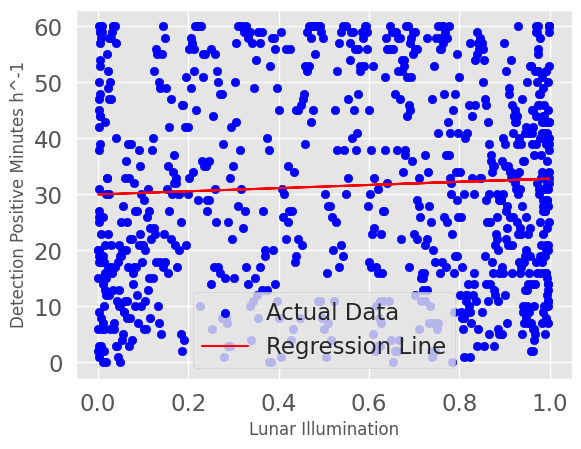

In [207]:
plt.scatter(x_dpm, y_dpm, color = "blue", label = "Actual Data")
plt.plot(x_dpm, model.predict(x_dpm), color = "red", label = "Regression Line")
plt.xlabel("Lunar Illumination")
plt.ylabel("Detection Positive Minutes h^-1")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

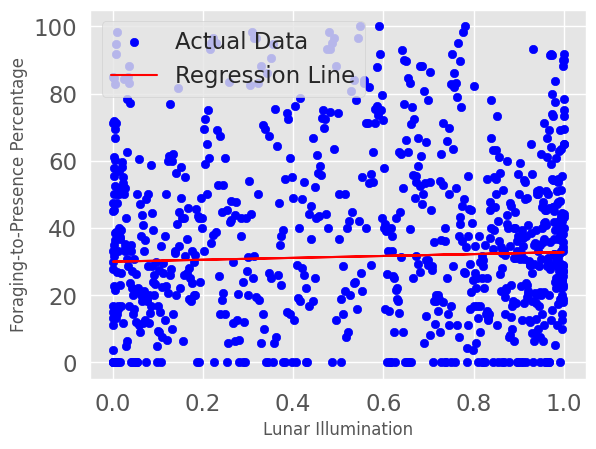

In [208]:
plt.scatter(x_fpp, y_fpp, color = "blue", label = "Actual Data")
plt.plot(x_fpp, model.predict(x_fpp), color = "red", label = "Regression Line")
plt.xlabel("Lunar Illumination")
plt.ylabel("Foraging-to-Presence Percentage")
plt.legend()
plt.show

Evaluate the performance of each linear regression model.

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Showing predicted y value (Detection Positive Minutes) based on test data.

y_dpm_pred = model.predict(x_dpm_test)
mae_dpm = mean_absolute_error(y_dpm_test, y_dpm_pred)
mse_dpm = mean_squared_error(y_dpm_test, y_dpm_pred)
r2_dpm = r2_score(y_dpm_test, y_dpm_pred)

print(f"Mean absolute error: {mae_dpm: .2f}")
print(f"Mean Squared error: {mse_dpm: .2f}")
print(f"R2 score: {r2_dpm: .2f}")

Mean absolute error:  15.58
Mean Squared error:  321.10
R2 score: -0.01


In [210]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Showing predicted y value (Foraging to Presence Percentage) based on test data.

y_fpp_pred = model.predict(x_fpp_test)
mae_fpp = mean_absolute_error(y_fpp_test, y_fpp_pred)
mse_fpp = mean_squared_error(y_fpp_test, y_fpp_pred)
r2_fpp = r2_score(y_fpp_test, y_fpp_pred)

print(f"Mean absolute error: {mae_fpp: .2f}")
print(f"Mean Squared error: {mse_fpp: .2f}")
print(f"R2 score: {r2_fpp: .2f}")

Mean absolute error:  19.74
Mean Squared error:  609.82
R2 score: -0.03


Given the visualizations, which did not show a relationship between lunar illumination and presence or a relationship between lunar illumination and foraging activity, both of the linear regression models did not perform to a high degree supported by the low R2 scores.